### This data exploration works on 1st round cleaned dataset  - Motorway, A(M) and A road only

Data from 2014 are taken as an example. Other years' data will also be checked if needed.

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import folium
from IPython.display import display
matplotlib.style.use('ggplot')

/Users/XueqiWang/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Total number of accidents

([<matplotlib.axis.XTick at 0x116ccc690>,
 <a list of 6 Text xticklabel objects>)

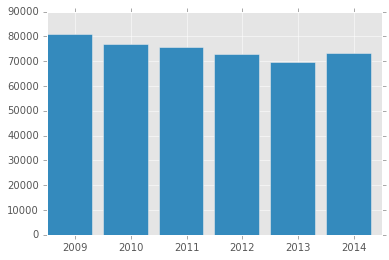

In [2]:
%matplotlib inline
years = ['2009', '2010', '2011', '2012', '2013', '2014']
n = [0]*6
i = 0
for year in years:
    df = pd.read_csv('data1/Accidents_' + year + '.csv', low_memory=False)
    n[i] = len(df)
    i += 1
x = range(6)
plt.figure()
plt.bar(x, n)
plt.xticks([0.5,1.5,2.5,3.5,4.5,5.5], years)

# Accident Severity

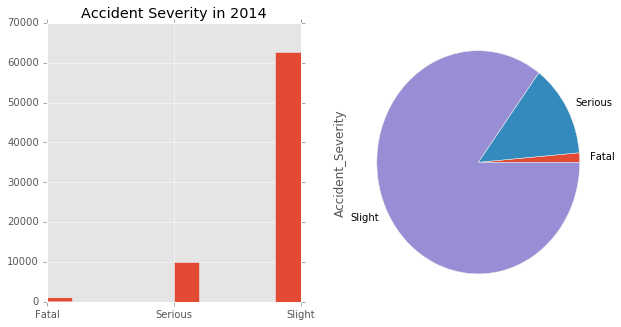

In [39]:
%matplotlib inline
df = pd.read_csv('data1/Accidents_2014.csv',low_memory=False)
df = df['Accident_Severity']
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
df.hist()
plt.xticks([1,2,3],['Fatal', 'Serious','Slight'])
plt.title('Accident Severity in 2014')

plt.subplot(1,2,2)
s = df.value_counts()
s = s.reindex([1,2,3])
labels = ['Fatal', 'Serious','Slight']
s.plot.pie(labels = labels)
plt.show()

,2009,2010,2011,2012,2013,2014
Accident_Severity,,,,,,
Fatal,1278,1077,1133,976,1002,1002
Serious,10735,10026,10323,10037,9471,9891
Slight,68779,65671,64252,61768,59347,62565


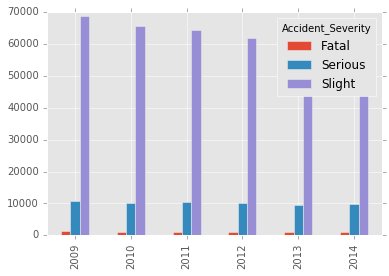

In [74]:
%matplotlib inline
years = ['2009', '2010', '2011', '2012', '2013', '2014']
n = [0]*6
i = 0
d = {}
for year in years:
    df = pd.read_csv('data1/Accidents_' + year + '.csv', low_memory=False)
    n[i] = df['Accident_Severity'].value_counts()
    d[year] = n[i]

df = pd.DataFrame(d,index = [1,2,3])
df['Accident_Severity'] = pd.Series(['Fatal', 'Serious','Slight'],index=[1,2,3])
df = df.set_index('Accident_Severity')
display(df)
df2 = df.T
df2.plot.bar()

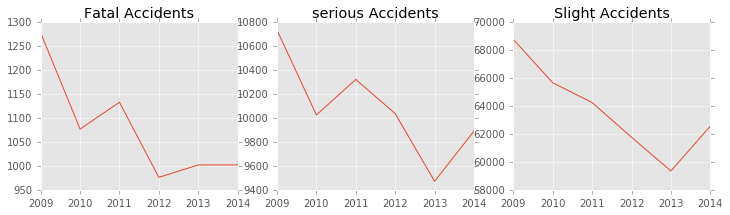

In [89]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
df2['Fatal'].plot()
plt.title('Fatal Accidents')
plt.subplot(1,3,2)
df2['Serious'].plot()
plt.title('serious Accidents')
plt.subplot(1,3,3)
df2['Slight'].plot()
plt.title('Slight Accidents')

# Number of Vehicles

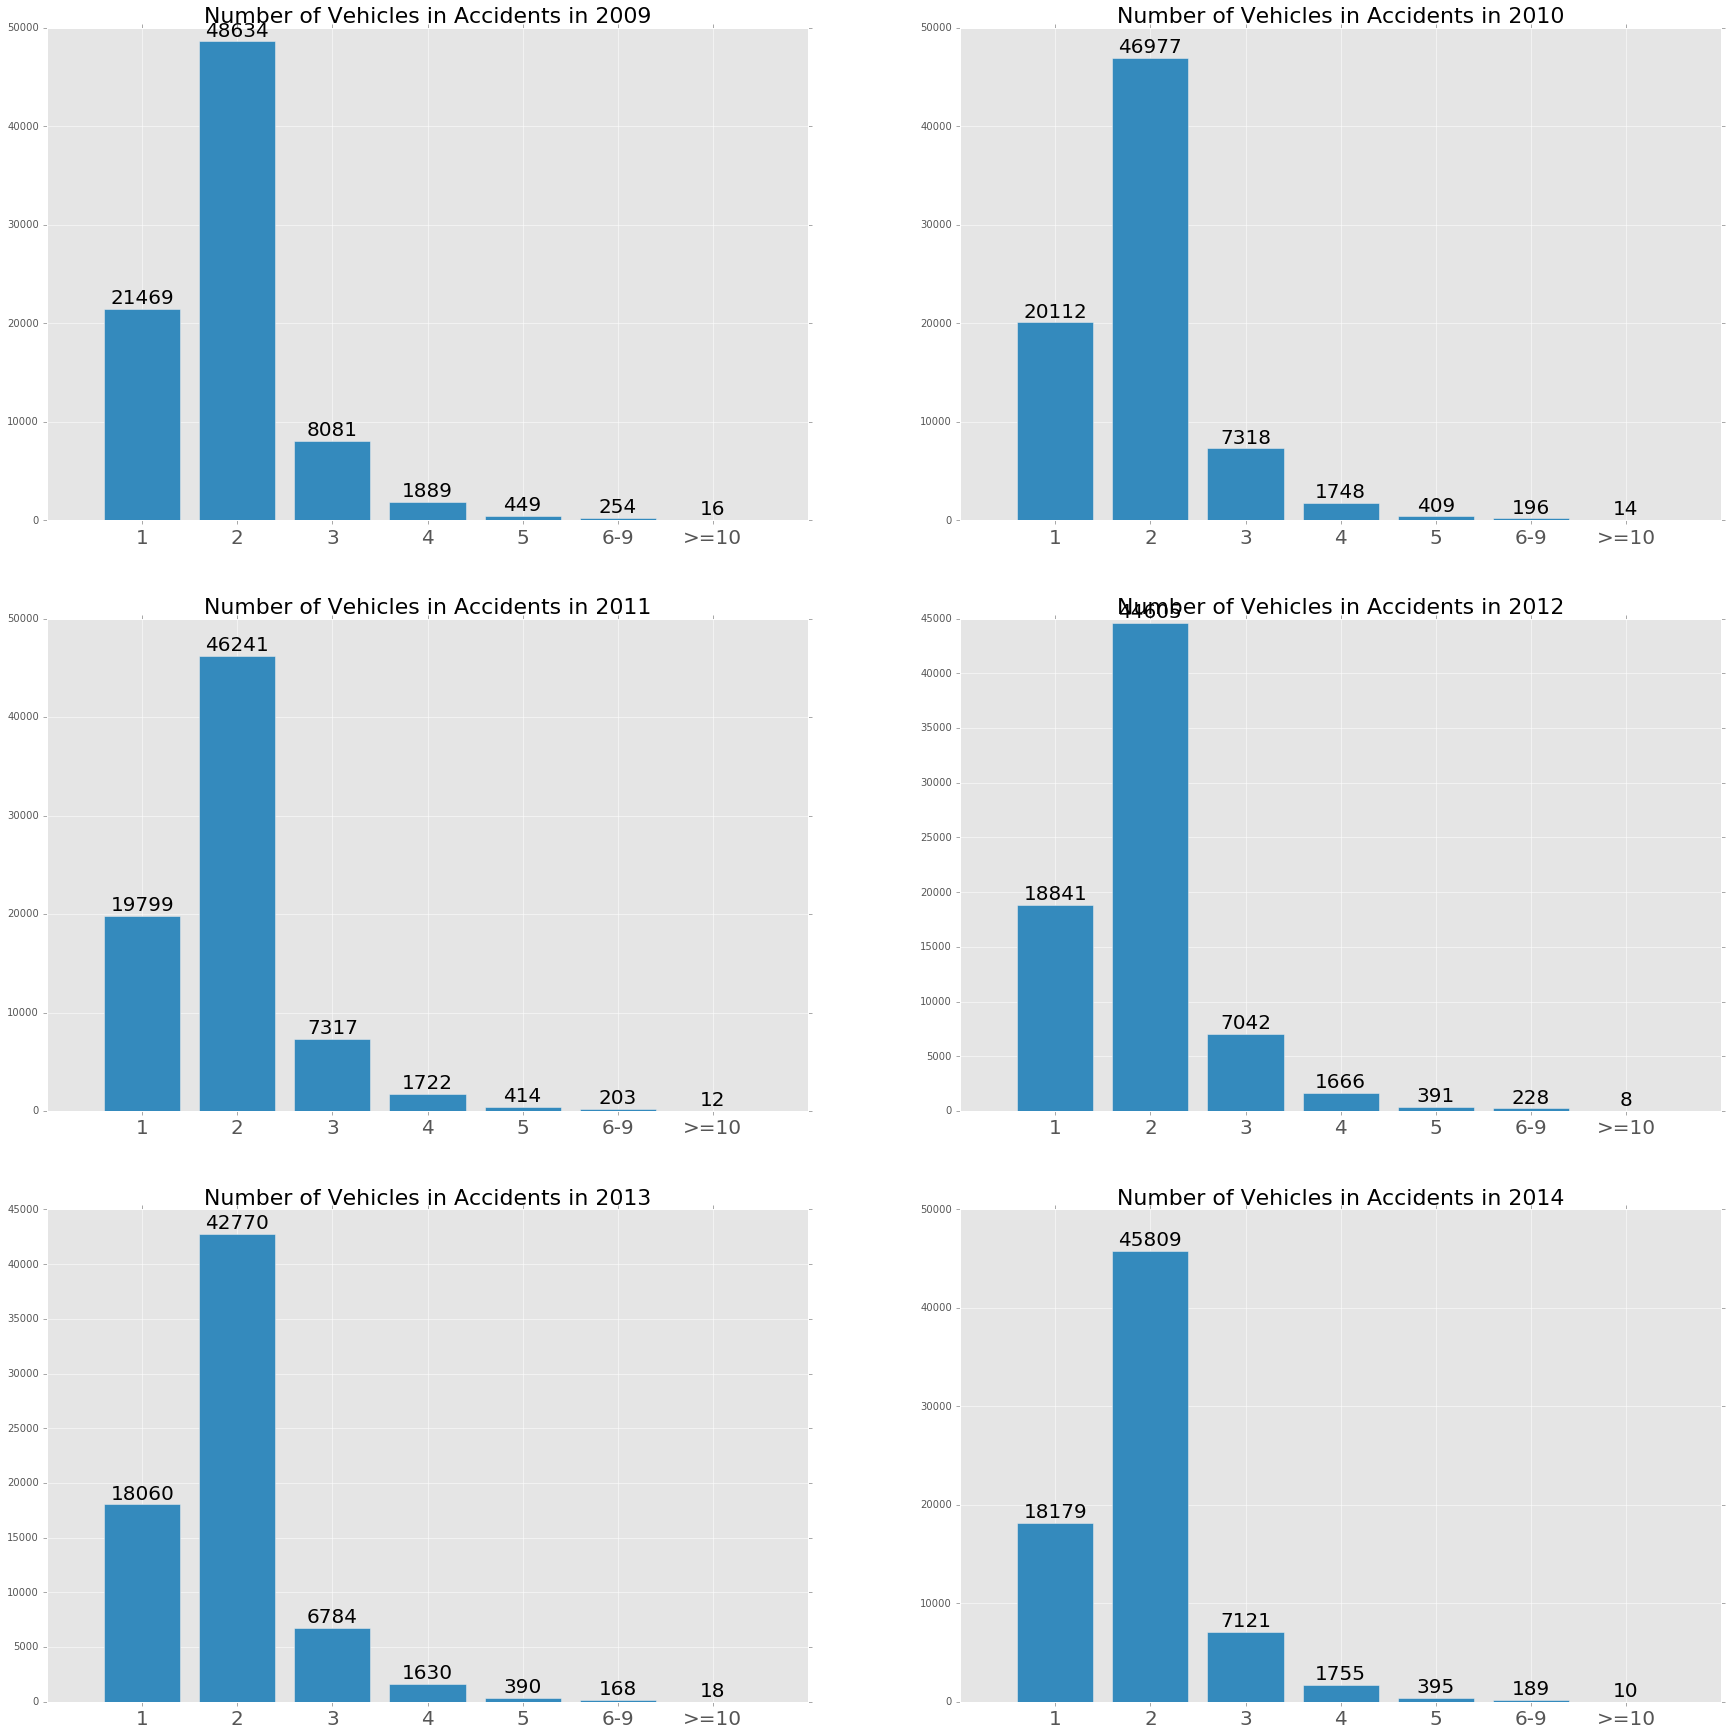

In [21]:
%matplotlib inline
years = ['2009', '2010', '2011', '2012', '2013', '2014']
plt.figure(figsize = (30,30))
nfig = 1
for year in years:
    df = pd.read_csv('data1/Accidents_' + year + '.csv',low_memory=False)
    s = df['Number_of_Vehicles'].value_counts()
    bins = [0]*7
    s = s.sort_index(axis = 0, ascending = True)
    for i in range(6):
        bins[i] = s[i+1]
    bins[5] = sum(s.loc[6:9])
    bins[6] = sum(s.loc[10:])
    plt.subplot(3,2,nfig)
    index = range(1,8)
    plt.bar(index, bins,align = 'center')
    labels = ['1','2','3','4','5','6-9','>=10']
    plt.title('Number of Vehicles in Accidents in ' + year, fontsize = 22)
    plt.xticks(index,labels, fontsize = 20)
    for j, v in zip(index, bins):
        plt.text(j, v+100, v, ha='center', va='bottom',fontsize = 20)
    nfig += 1

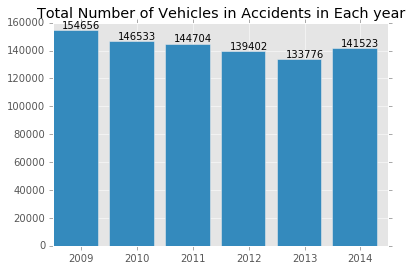

In [27]:
%matplotlib inline
years = ['2009', '2010', '2011', '2012', '2013', '2014']
n = [0]*6
i = 0
for year in years:
    df = pd.read_csv('data1/Accidents_' + year + '.csv', low_memory=False)
    n[i] = df['Number_of_Vehicles'].sum()
    i += 1
x = range(6)
plt.figure()
plt.bar(x, n)
plt.xticks([0.5,1.5,2.5,3.5,4.5,5.5], years)
plt.title('Total Number of Vehicles in Accidents in Each year')
for j, v in zip(x, n):
        plt.text(j+0.5, v+100, v, ha='center', va='bottom')

The trend of total number of vehicles in accident during these 6 years is quite similar to the total number of accidents in these years.

# Number of Casualties

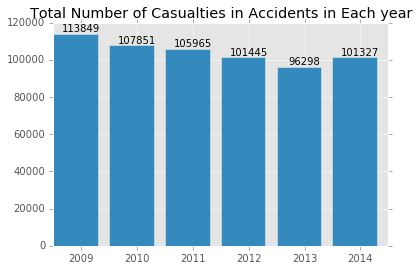

In [32]:
%matplotlib inline
years = ['2009', '2010', '2011', '2012', '2013', '2014']
n = [0]*6
i = 0
for year in years:
    df = pd.read_csv('data1/Accidents_' + year + '.csv', low_memory=False)
    n[i] = df['Number_of_Casualties'].sum()
    i += 1
x = range(6)
plt.figure()
plt.bar(x, n)
plt.xticks([0.5,1.5,2.5,3.5,4.5,5.5], years)
plt.title('Total Number of Casualties in Accidents in Each year')
for j, v in zip(x, n):
        plt.text(j+0.5, v+100, v, ha='center', va='bottom')

The trend of total number of casualties is also very similar to the trend of the number of accidents during these years.

### Total number of casualties on Motorway, A(M), A roads
Check the correctness of data selection on casualty dataset.

The graph is the same as above, so we selected data from target roads on casualties dataset successfully.

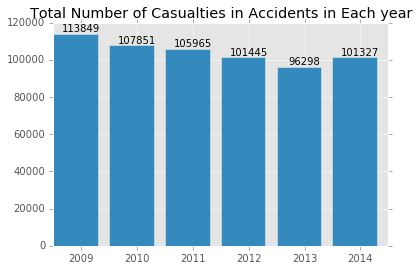

In [33]:
%matplotlib inline
years = ['2009', '2010', '2011', '2012', '2013', '2014']
n = [0]*6
i = 0
for year in years:
    df = pd.read_csv('data1/Casualties_' + year + '.csv', low_memory=False)
    n[i] = len(df)
    i += 1
x = range(6)
plt.figure()
plt.bar(x, n)
plt.xticks([0.5,1.5,2.5,3.5,4.5,5.5], years)
plt.title('Total Number of Casualties in Accidents in Each year')
for j, v in zip(x, n):
        plt.text(j+0.5, v+100, v, ha='center', va='bottom')

**Columns of casualty dataset:**

[u'Acc_Index', u'Vehicle_Reference', u'Casualty_Reference',
       u'Casualty_Class', u'Sex_of_Casualty', u'Age_Band_of_Casualty',
       u'Casualty_Severity', u'Pedestrian_Location', u'Pedestrian_Movement',
       u'Car_Passenger', u'Bus_or_Coach_Passenger',
       u'Pedestrian_Road_Maintenance_Worker', u'Casualty_Type',
       u'Casualty_Home_Area_Type']

### 1. Casualty Severity

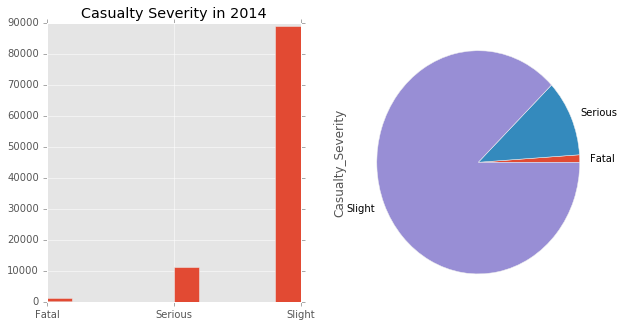

In [35]:
%matplotlib inline
df = pd.read_csv('data1/Casualties_2014.csv',low_memory=False)
df = df['Casualty_Severity']
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
df.hist()
plt.xticks([1,2,3],['Fatal', 'Serious','Slight'])
plt.title('Casualty Severity in 2014')

plt.subplot(1,2,2)
s = df.value_counts()
s = s.reindex([1,2,3])
labels = ['Fatal', 'Serious','Slight']
s.plot.pie(labels = labels)
plt.show()

The bar chart and pie chart here are very similar to those of accident severity in 2014

,2009,2010,2011,2012,2013,2014
Casualty_Severity,,,,,,
Fatal,1399,1168,1215,1055,1076,1090
Serious,12423,11363,11658,11339,10747,11242
Slight,100027,95320,93092,89051,84475,88995


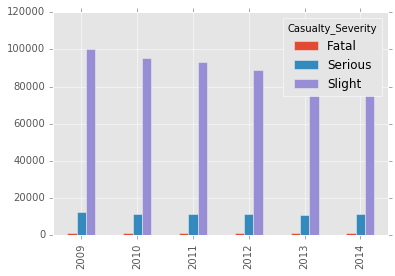

In [36]:
%matplotlib inline
years = ['2009', '2010', '2011', '2012', '2013', '2014']
n = [0]*6
i = 0
d = {}
for year in years:
    df = pd.read_csv('data1/Casualties_' + year + '.csv', low_memory=False)
    n[i] = df['Casualty_Severity'].value_counts()
    d[year] = n[i]

df = pd.DataFrame(d,index = [1,2,3])
df['Casualty_Severity'] = pd.Series(['Fatal', 'Serious','Slight'],index=[1,2,3])
df = df.set_index('Casualty_Severity')
display(df)
df2 = df.T
df2.plot.bar()

**Fatal and serious casualties**

,2009,2010,2011,2012,2013,2014
Casualty_Severity,,,,,,
Fatal,1399,1168,1215,1055,1076,1090
Serious,12423,11363,11658,11339,10747,11242


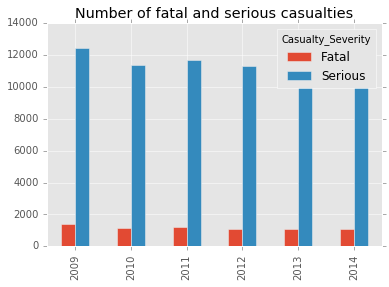

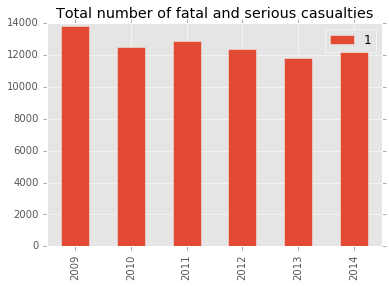

In [43]:
%matplotlib inline
years = ['2009', '2010', '2011', '2012', '2013', '2014']
n = [0]*6
i = 0
d = {}
d3 = {}
for year in years:
    df = pd.read_csv('data1/Casualties_' + year + '.csv', low_memory=False)
    n[i] = df['Casualty_Severity'].value_counts()
    d[year] = n[i]
    d3[year] = len(df[df['Casualty_Severity']<3])

df = pd.DataFrame(d,index = [1,2])
df['Casualty_Severity'] = pd.Series(['Fatal', 'Serious'],index=[1,2])
df = df.set_index('Casualty_Severity')
display(df)
df2 = df.T
#plt.subplot(2,1,1)
df2.plot.bar()
plt.title('Number of fatal and serious casualties')

#plt.subplot(2,1,2)
df3 = pd.DataFrame(d3, index=[1])
df3 = df3.T
df3.plot.bar()
plt.title('Total number of fatal and serious casualties')

plt.show()

### 2. Casualty Class